# Matplotlib Example

In [1]:
# load lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.decomposition import PCA
import imageio

In [2]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 2.6 MB/s eta 0:00:01     |██▌                             | 266 kB 2.7 MB/s eta 0:00:02
     |████████████████████████████████| 15.7 MB 2.6 MB/s eta 0:00:01    |█▌                              | 757 kB 2.7 MB/s eta 0:00:06     |██▌                             | 1.2 MB 2.7 MB/s eta 0:00:06     |██████████████▌                 | 7.1 MB 2.9 MB/s eta 0:00:03
     |████████████████████████████████| 4.3 MB 3.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, bu

In [2]:
df = sns.load_dataset('iris')

<Figure size 480x480 with 0 Axes>

<Figure size 480x480 with 0 Axes>

In [4]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

<Figure size 480x480 with 0 Axes>

<Figure size 480x480 with 0 Axes>

In [5]:
# Keep the 'specie' column appart + make it numeric for coloring
df['species']=pd.Categorical(df['species'])
my_color=df['species'].cat.codes
df = df.drop('species', 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [6]:
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [7]:
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


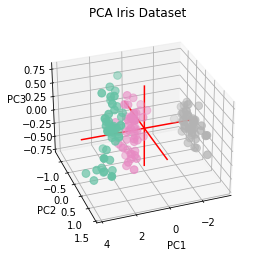

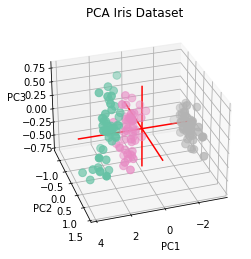

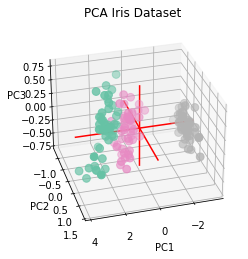

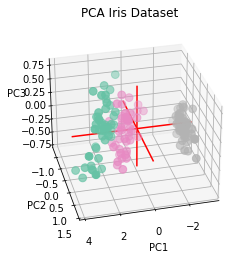

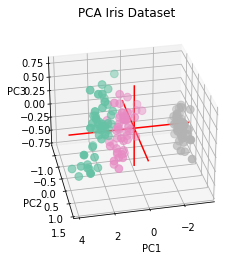

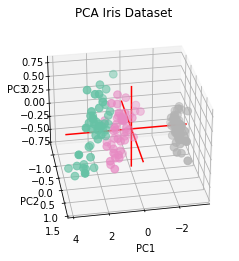

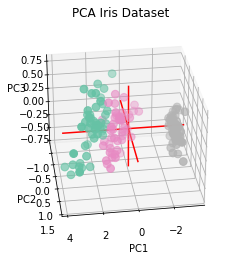

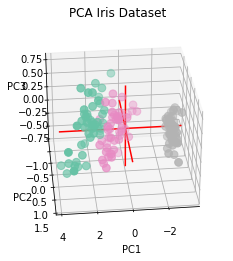

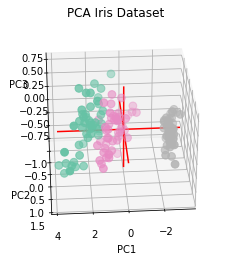

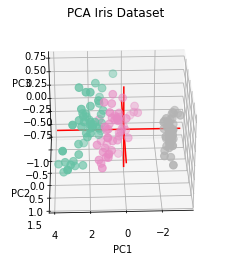

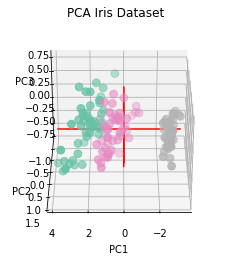

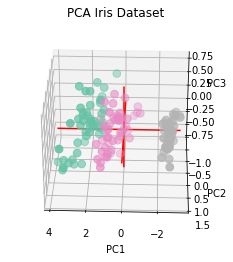

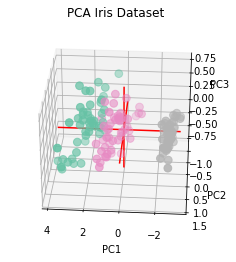

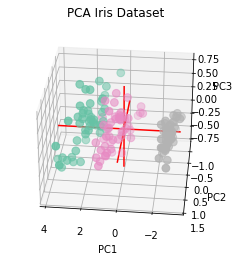

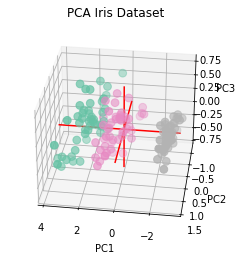

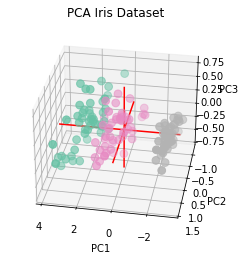

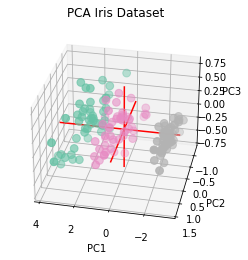

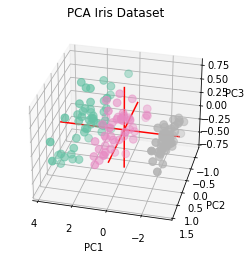

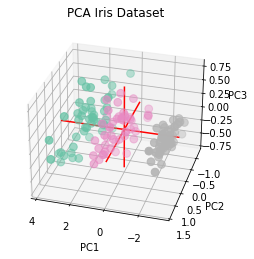

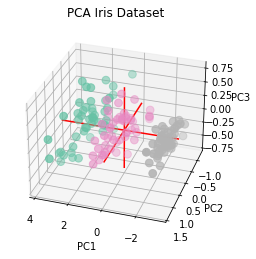

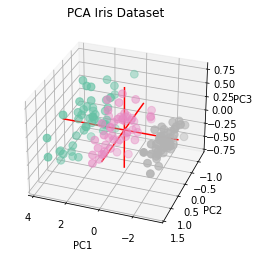

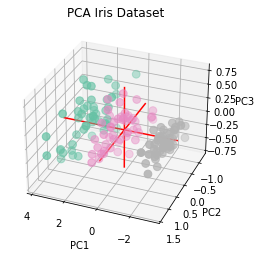

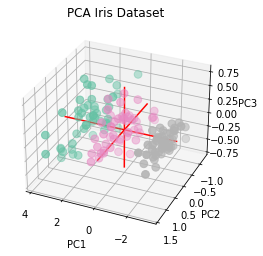

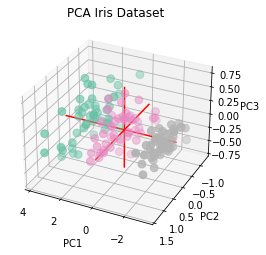

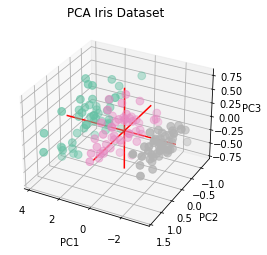

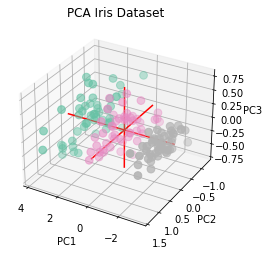

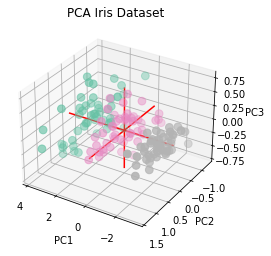

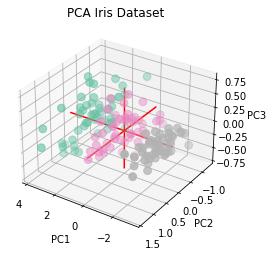

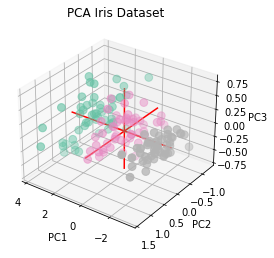

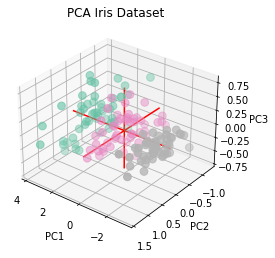

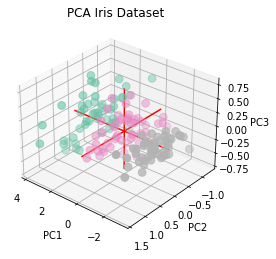

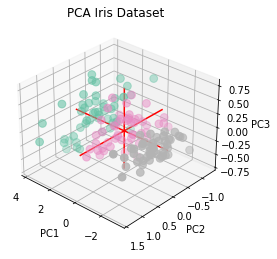

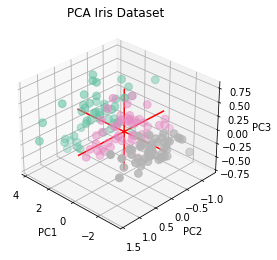

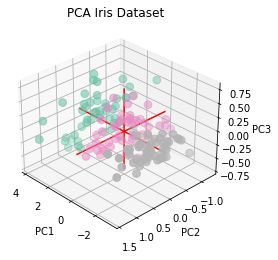

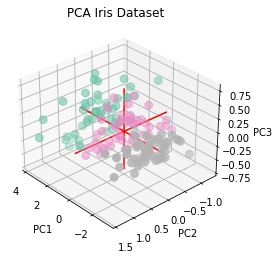

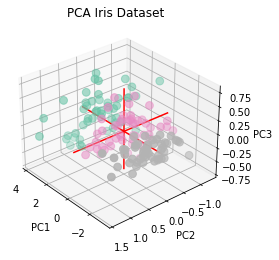

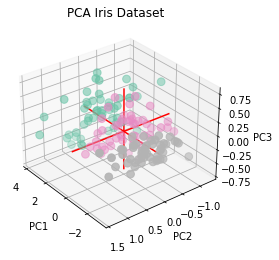

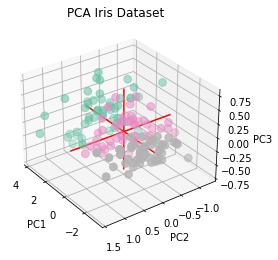

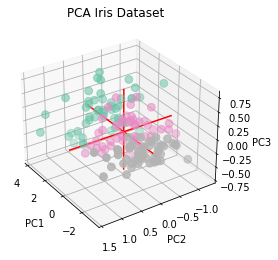

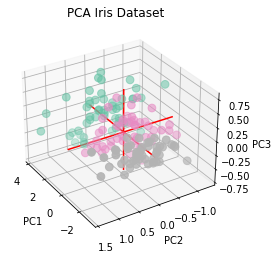

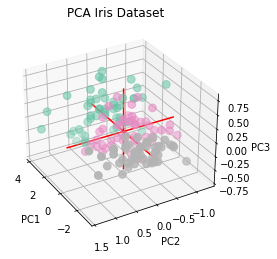

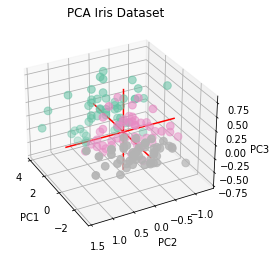

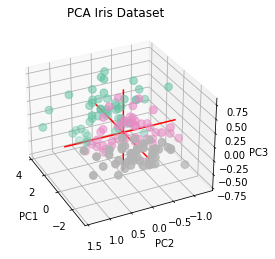

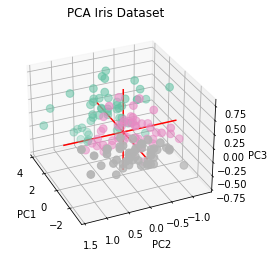

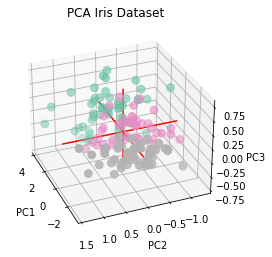

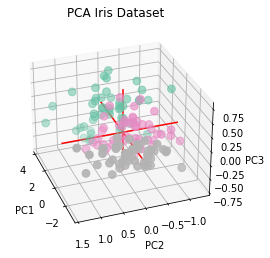

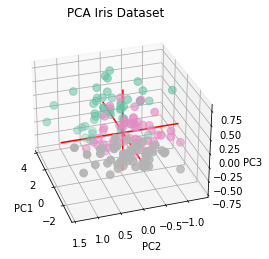

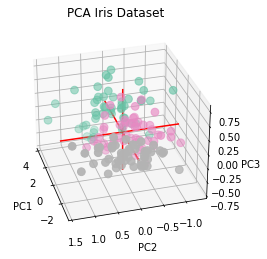

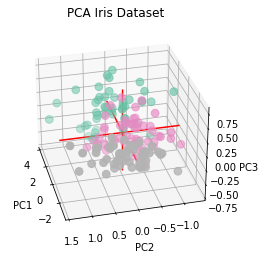

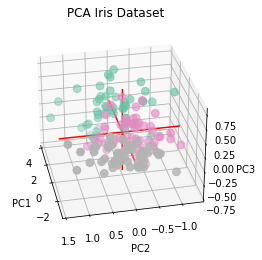

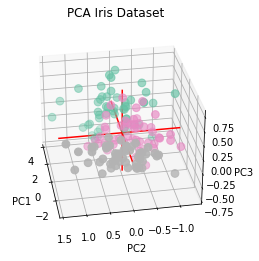

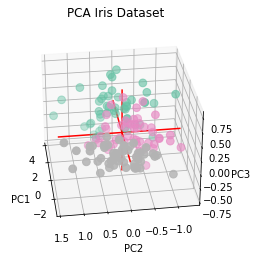

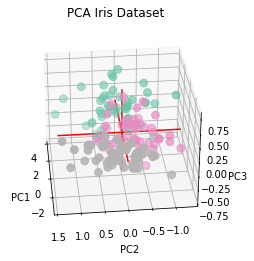

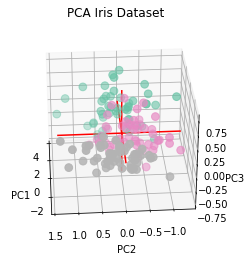

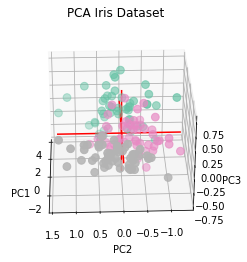

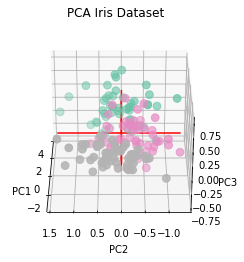

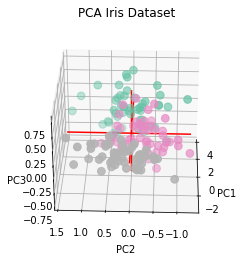

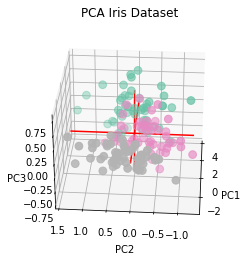

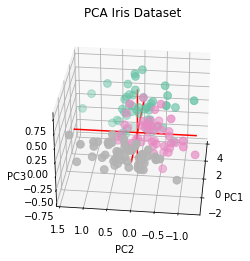

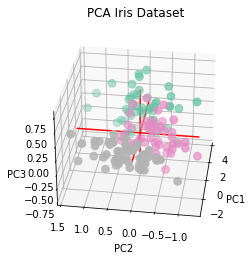

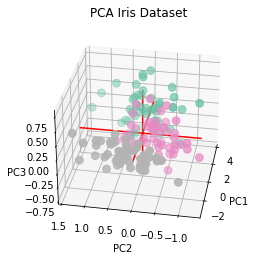

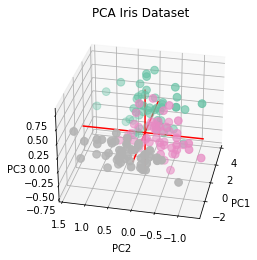

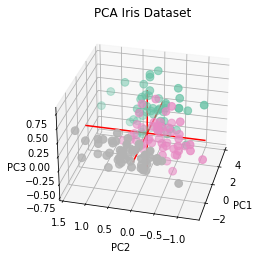

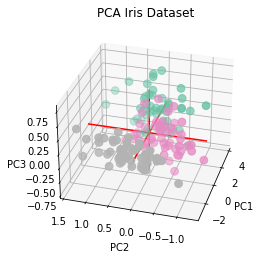

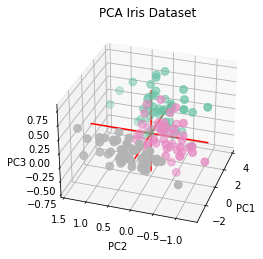

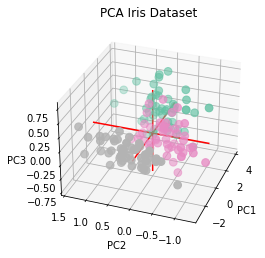

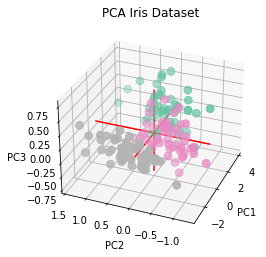

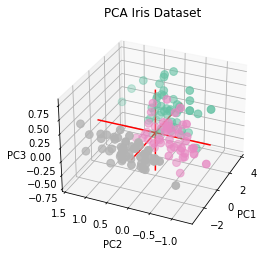

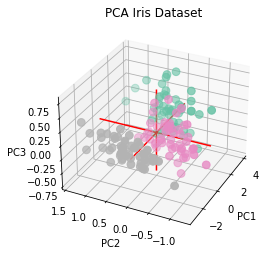

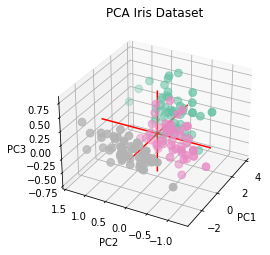

In [10]:
# 20 plots, for 20 different angles
for angle in range(70,210,2):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    
    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA Iris Dataset")
    filename='PCA/PCA_angle'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)

In [11]:
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [12]:
make_gif('./PCA/', './PCA/PCA.gif') 

![./PCA/PCA.gif]